In [1]:
import eval

* OpenEA datasets (Monolingual)

In [10]:
REF_PATH = 'data/OpenEA/D_W_15K_V1/'
RES_PATH = 'save/dw-v1.ttl'
CLEAN_RES_PATH = 'save/dw-v1-clean.ttl'

In [11]:
y_gold = eval.load_openea_ref(REF_PATH)
len(y_gold)

15000

In [12]:
threshold = 0.1
prefix = 'http://dbpedia.org/resource/'
sameAsscores, ent_max_assign = eval.load_ent_results(RES_PATH, prefix, threshold)

In [13]:
eval.openea_eval(ent_max_assign, set(y_gold), save_path=CLEAN_RES_PATH)

Precision: 0.9545
Recall: 0.8419
F1: 0.8947

Saved final results to "save/dw-v1-clean.ttl"


* DBP15K (Multilingual)

In [2]:
REF_PATH = 'data/DBP15k/zh_en/'
RES_PATH = 'save/dbp15k-zh-en.ttl'

In [3]:
seed_pairs, ref_pairs = eval.load_dbp15k_ref(REF_PATH)
test_pairs = ref_pairs.copy()
ref_pairs.update(seed_pairs)
len(test_pairs), len(ref_pairs), len(seed_pairs)

(10500, 15000, 4500)

In [4]:
kb1_prefix = 'http://zh.dbpedia.org/resource/'
sameAsscores, ent_max_assign = eval.load_ent_results(RES_PATH, kb1_prefix)

In [ ]:
# Ranking Based Metrics: refer to whole results
eval.dbp15k_eval(ref_pairs, sameAsscores)

Hit@1: 0.9759
Hit@10: 0.9882
MRR: 0.9812


* OAEI KGs

In [2]:
REF_PATH = 'data/OAEI/memoryalpha-stexpanded/'
RES_PATH = 'save/memoryalpha-stexpanded.ttl'
CLEAN_RES_PATH = 'save/memoryalpha-stexpanded-clean.ttl'

In [3]:
prefix1 = 'http://dbkwik.webdatacommons.org/memory-alpha.wikia.com/'
prefix2 = 'http://dbkwik.webdatacommons.org/stexpanded.wikia.com/'
# # starswars-swtor
# prefix1 = 'http://dbkwik.webdatacommons.org/starwars.wikia.com/'
# prefix2 = 'http://dbkwik.webdatacommons.org/swtor.wikia.com/'
threshold = 0.1

In [4]:
class_gt, property_gt, instance_gt = eval.load_oaei_ref(REF_PATH, prefix1)

In [5]:
len(class_gt), len(property_gt), len(instance_gt)

(13, 41, 1725)

In [6]:
y_pred_inst, y_pred_class, y_pred_similar, y_pred_sameAs = eval.load_full_results_oaei_kg_track(class_gt, instance_gt, property_gt, prefix1, RES_PATH)

In [8]:
eval.oaei_kg_eval(class_gt, instance_gt, property_gt,
                  y_pred_class, y_pred_inst, y_pred_sameAs, y_pred_similar,
                  prefix1, prefix2, threshold, save_path=CLEAN_RES_PATH)

**Instances: 
   Precision: 1.0000, Recall: 0.9461, F1: 0.9723
**Classes: 
   Precision: 1.0000, Recall: 0.8462, F1: 0.9167
**Properties: 
   Precision: 1.0000, Recall: 0.9756, F1: 0.9877
**Overall: 
   Precision: 1.0000, Recall: 0.9460, F1: 0.9723

Saved final results to "save/memoryalpha-stexpanded-clean.ttl"


* Draw graph

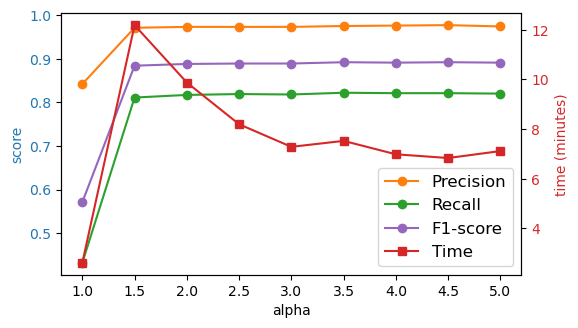

In [ ]:
import matplotlib.pyplot as plt

alpha = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
y_precision = [0.842, 0.971, 0.973, 0.973, 0.973, 0.975, 0.976, 0.977, 0.974]
y_recall = [0.432, 0.811, 0.817, 0.819, 0.818,  0.822, 0.821, 0.821, 0.820]
y_f1 = [0.571, 0.884, 0.888, 0.889, 0.889, 0.892, 0.891, 0.892, 0.891]
y_time = [2.61, 12.18, 9.87, 8.19, 7.28, 7.52, 6.98, 6.83, 7.11]

fig, ax1 = plt.subplots(figsize=(6, 3.5))
# ax1.set_ylim(0.55, 1.0)
plt.rcParams.update({'font.size': 14})

color = 'tab:blue'
ax1.set_xlabel('alpha')
ax1.set_ylabel('score', color=color)
# ax1.plot(alpha, y1, marker='o', color=color, label='Score')
line1, = ax1.plot(alpha, y_precision, marker='o', color='tab:orange', label='Precision')
line2, = ax1.plot(alpha, y_recall, marker='o', color='tab:green', label='Recall')
line3,  = ax1.plot(alpha, y_f1, marker='o', color='tab:purple', label='F1-score')
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('time (minutes)', color=color)
# ax2.plot(alpha, y2, marker='s', color=color, label='Time')
line4, = ax2.plot(alpha, y_time, marker='s', color=color, label='Time')
ax2.tick_params(axis='y', labelcolor=color)


lines = [line1, line2, line3, line4]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='lower right', fontsize=12)


fig.tight_layout(pad=1.5)
# plt.title('D-W-15k-V1')
plt.savefig("D-W-15k-V1.pdf", format="pdf", bbox_inches='tight')
# plt.grid(True)
plt.show()
